<a href="https://colab.research.google.com/github/dnaneet/SVD_PCA/blob/master/grading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight') #Plot style preferred by author.

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from scipy import stats

from tabulate import tabulate #pretty display of tables


In [0]:
url = 'https://raw.githubusercontent.com/dnaneet/SVD_PCA/master/grading/mep3_s18.csv'
 

df1 = pd.read_csv(url)
performance = df1.values
scores = performance[:,0:3]
total = performance[:,3]


#df1.drop(df1.columns[0], axis = 1) 
#df1.iloc[:,0]
#scores = np.array(df1.iloc[:,0:3])
#avg = np.array(df1.iloc[:,3])

#scores = df1.iloc[:,0:2]
#avg = df1.iloc[:,3]
#scores.head(5)

#print(scores)
#print('\n\n')
#print(avg)

In [0]:
scaler = StandardScaler()
scores_scaled = scaler.fit_transform(scores)
#print(scores)
type(scores_scaled)
#scores_scaled


[0.55225384 0.28596972]


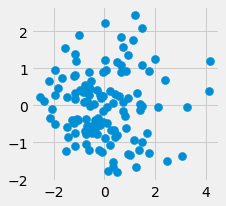

In [0]:


pca = sklearnPCA(n_components=2) #2-dimensional PCA
pca_scores = pca.fit_transform(scores_scaled)
print(pca.explained_variance_ratio_)  
transformed = pd.DataFrame(pca_scores)
#print(transformed.head(5))
pca12 = np.array(transformed)

plt.figure(figsize=(3,3))
plt.scatter(pca12[:,0], pca12[:,1],  s=65)

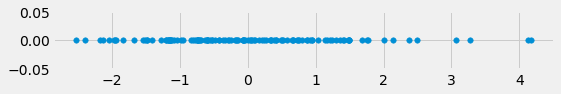

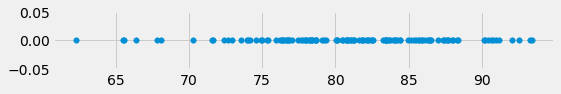

In [0]:
plt.figure(figsize=(8,1))
plt.scatter(pca12[:,0] ,np.zeros(len(total)), s=30)
plt.show()
plt.figure(figsize=(8,1))
plt.scatter(avg, np.zeros(len(total)), s=30)

[[ 0.31922983 -0.85579294]
 [-1.12923126  0.1571426 ]
 [ 3.09377688 -0.09243305]
 [ 0.87209197  0.97346282]]


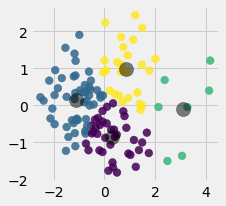

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(pca12)
labels_kmean = kmeans.predict(pca12)

plt.figure(figsize=(3,3))
plt.scatter(pca12[:, 0], pca12[:, 1], c=labels_kmean, s=60, cmap='viridis', alpha=0.85)

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

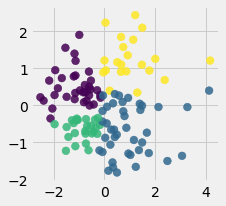

In [0]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans',random_state=0)
labels_spectral = spectral.fit_predict(pca12)

plt.figure(figsize=(3,3))
plt.scatter(pca12[:, 0], pca12[:, 1], c=labels_spectral, s=60, cmap='viridis', alpha=0.85)


In [0]:
#scores_array = np.array(scores);
#df = pd.DataFrame({'total' : total, 
#                   'cluster (spectral)' : labels_spectral,
#                   'cluster (k-means)' : labels_kmean, 
#                   'individual \nwork' : scores[:,0]/200, 
#                   'group\nwork' : scores[:,1]/400, 
#                   'exams' : scores[:,2]/400,
#                   'pca1' : pca12[:,0], 
#                   'pca2' : pca12[:,1]})

df = pd.DataFrame({'total' : total, 
                   'cluster (k-means)' : labels_kmean, 
                   'individual \nwork' : scores[:,0]/200, 
                   'group\nwork' : scores[:,1]/400, 
                   'exams' : scores[:,2]/400})

df_sorted = df.sort_values('total')
print(tabulate(df_sorted, headers='keys', tablefmt='psql'))


In [0]:
df_cluster_grouped = df_sorted.groupby(df_sorted['cluster (k-means)'])
print(np.array(df_cluster_grouped))


[[0
           total  cluster (k-means)  individual \nwork  group\nwork     exams
86   70.304514                  0           0.786714     0.885714  0.478542
22   71.585519                  0           0.769931     0.872381  0.532292
68   72.366540                  0           0.823803     0.918095  0.479167
104  72.696038                  0           0.786528     0.904762  0.519375
35   73.973542                  0           0.795939     0.900952  0.550417
51   74.605961                  0           0.639227     0.940952  0.604583
37   74.922810                  0           0.795426     0.929524  0.545833
109  75.314169                  0           0.884578     0.862857  0.577708
17   76.197990                  0           0.788233     0.906667  0.604167
56   76.354561                  0           0.839335     0.961905  0.527292
72   76.556439                  0           0.889905     0.946667  0.522292
7    76.675138                  0           0.882209     0.902857  0.572917
40   7

In [0]:
plt.figure(figsize=(2,2))
plt.scatter(transformed[grades==1][0], transformed[grades==1][1], label='Class 1', c='red')
plt.scatter(transformed[grades==2][0], transformed[grades==2][1], label='Class 2', c='blue')
plt.scatter(transformed[grades==3][0], transformed[grades==3][1], label='Class 3', c='green')
plt.scatter(transformed[grades==4][0], transformed[grades==4][1], label='Class 4', c='black')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed[grades==1][0], transformed[grades==1][1], transformed[grades==1][2] , c='r', marker='o')
ax.scatter(transformed[grades==2][0], transformed[grades==2][1], transformed[grades==2][2] , c='g', marker='o')
ax.scatter(transformed[grades==3][0], transformed[grades==3][1], transformed[grades==3][1] , c='b', marker='o')
ax.scatter(transformed[grades==4][0], transformed[grades==4][1], transformed[grades==4][1] , c='k', marker='o')


NameError: ignored

<Figure size 144x144 with 0 Axes>